Import the needed libraries

In [20]:
import pandas as pd
import json 
import requests
import matplotlib.pyplot as plt
import numpy as np


Get the ticker symbols

In [21]:
tickers = []  # create an empty list to store ticker symbols

while True: 
    ts = input("Enter the ticker symbol of the company. Type \"stop\" to exit: ")  # prompt the user to enter a ticker symbol
    if ts.lower() == "stop":  # check if the user wants to stop
        break
    else:
        tickers.append(ts.upper())  # add the entered ticker symbol to the list

Set the API key  
_(Put here your API key)_

In [22]:
key = ""  # API key

Obtain historical data from the API, store it in a JSON file and store it in a list 

In [23]:
tickers_copy = tickers.copy()  # create a copy of the tickers list
dfs = []  # create an empty list to store the dataframes

for i in tickers_copy:
    with open(f"./{i}.json", "w+") as file:  # open a file for writing
        response = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{i}?serietype=line&apikey={key}")  # fetch data from the API
        if response.status_code != 200:  # check if the request was successful
            print(f"Failed to fetch data for {i}. Please check the ticker symbol and try again.")
            tickers.remove(i)  # remove the ticker symbol from the list if the request was not successful
            continue
        file.write(response.text)  # write the fetched data to the file
    
    df = pd.read_json(f"./{i}.json")  # read the content of the file
    if df.empty:  # check if the dataframe is empty
        print(f"No data found for {i}.")
        tickers.remove(i)  # remove the ticker symbol from the list if the dataframe is empty
        continue

    dfs.append(df)  # append the dataframe to the list

No data found for CIAO.
No data found for AMICO.


Define function to create dataframes

In [24]:
def create_dataframe(cont_SYMB):  # function to create a dataframe
    date = []  # create empty lists for date, close, and symbol
    close = [] 
    symbol = [] 
    for i in range(len(cont_SYMB["historical"])):  # iterate through the historical data
        symbol.append(cont_SYMB['symbol'][i])  # append the symbol
        date.append(cont_SYMB['historical'][i]['date'])  # append the date
        close.append(cont_SYMB['historical'][i]['close'])  # append the close
    dict_SYMB = {'Symbol': symbol, 'Date': date, 'Close': close}  # create a dictionary
    return pd.DataFrame(dict_SYMB)  # create a dataframe from the dictionary

Create dataframes

In [25]:
dfs_processed = [create_dataframe(df) for df in dfs]

Concatenate dataframes and save to CSV

In [26]:
df_merged = pd.concat(dfs_processed, ignore_index=True)

df_merged.to_csv('Historic_data.csv', index=False, header=True) 

Sort dataframes by date

In [27]:
df_prog = pd.read_csv('Historic_data.csv')  # read the CSV file

dfs_sorted = []  # create an empty list
for i in tickers:  # iterate through the tickers
    df_sorted = df_prog[df_prog["Symbol"] == i].sort_values(by="Date", ascending=True)  # sort the dataframe by date
    dfs_sorted.append(df_sorted)  # append the sorted dataframe to the list


Define function to plot data

In [28]:
def plot_df(df,title=""):  # function to plot the dataframe
    fig, ax = plt.subplots(figsize=(20, 10))  # set the figure size
    ax.plot(df['Date'], df['Close'])  # plot the date and close
    num_ticks = 50  # set the number of ticks
    step = len(df) // num_ticks  # calculate the step
    ax.set_xticks(df['Date'][::step])  # set the ticks
    plt.xticks(rotation=90)  # rotate the ticks
    plt.title(title)  # set the title


Run the function to plot the data

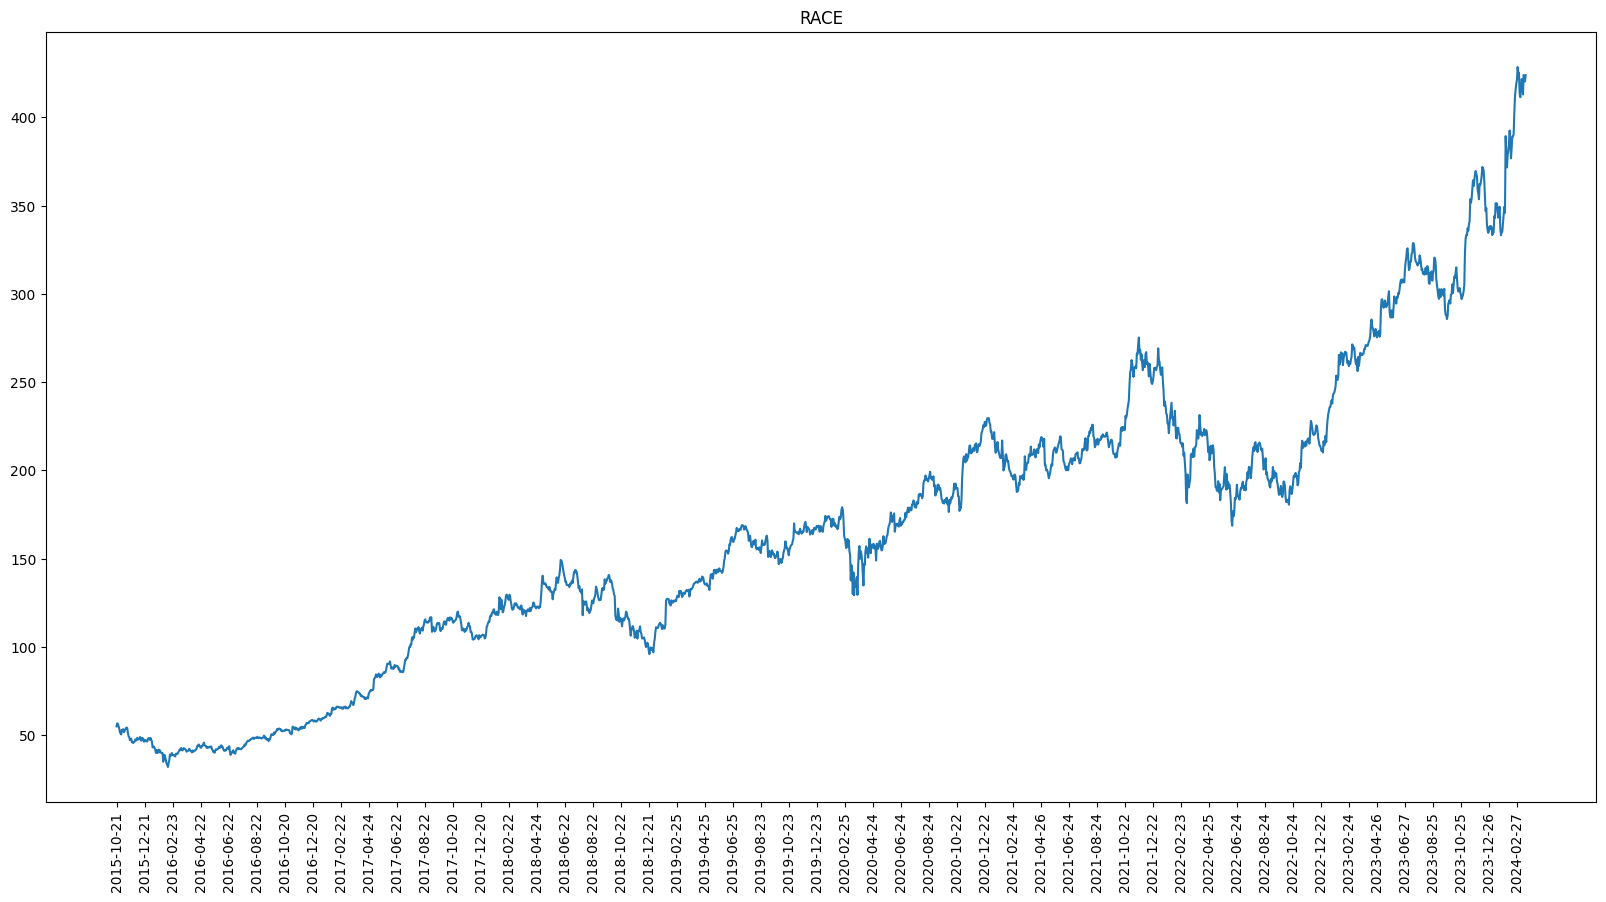

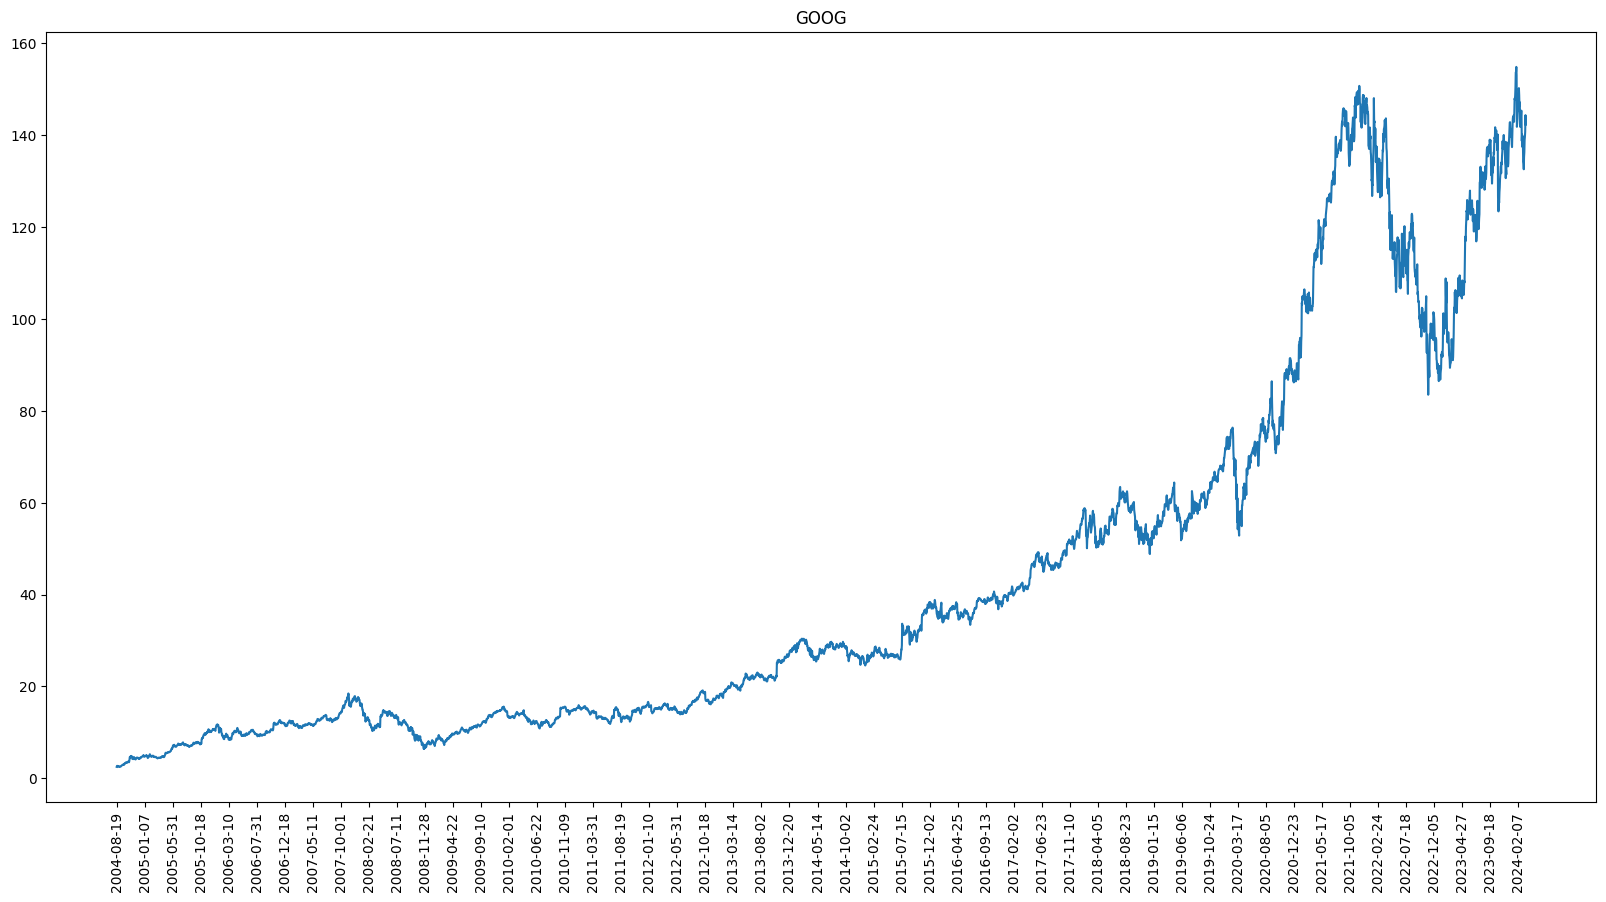

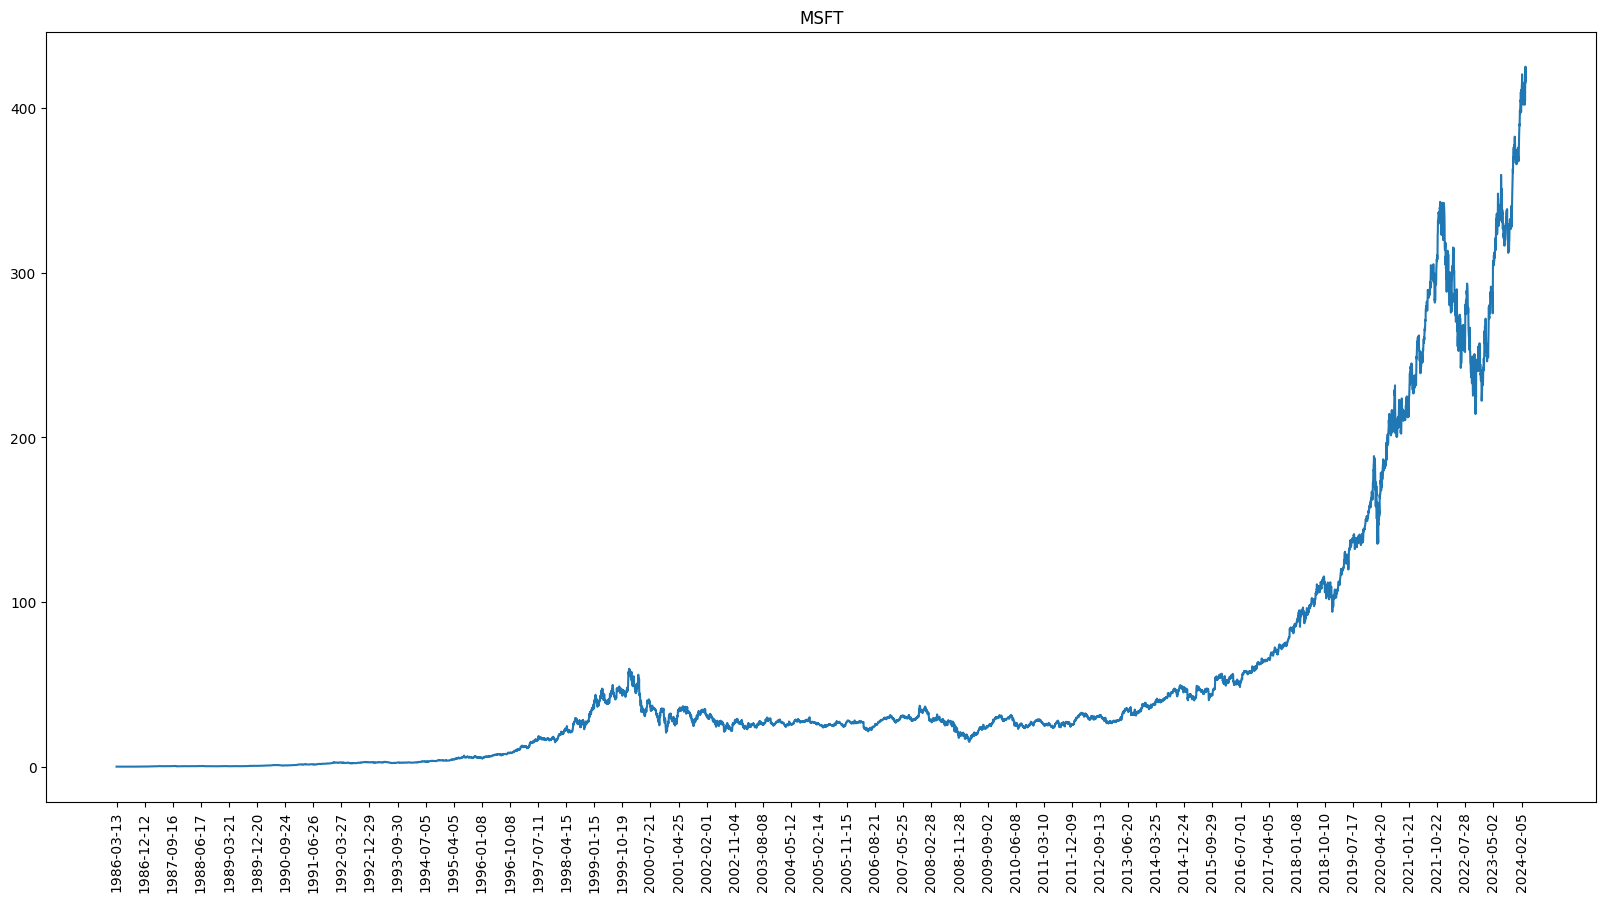

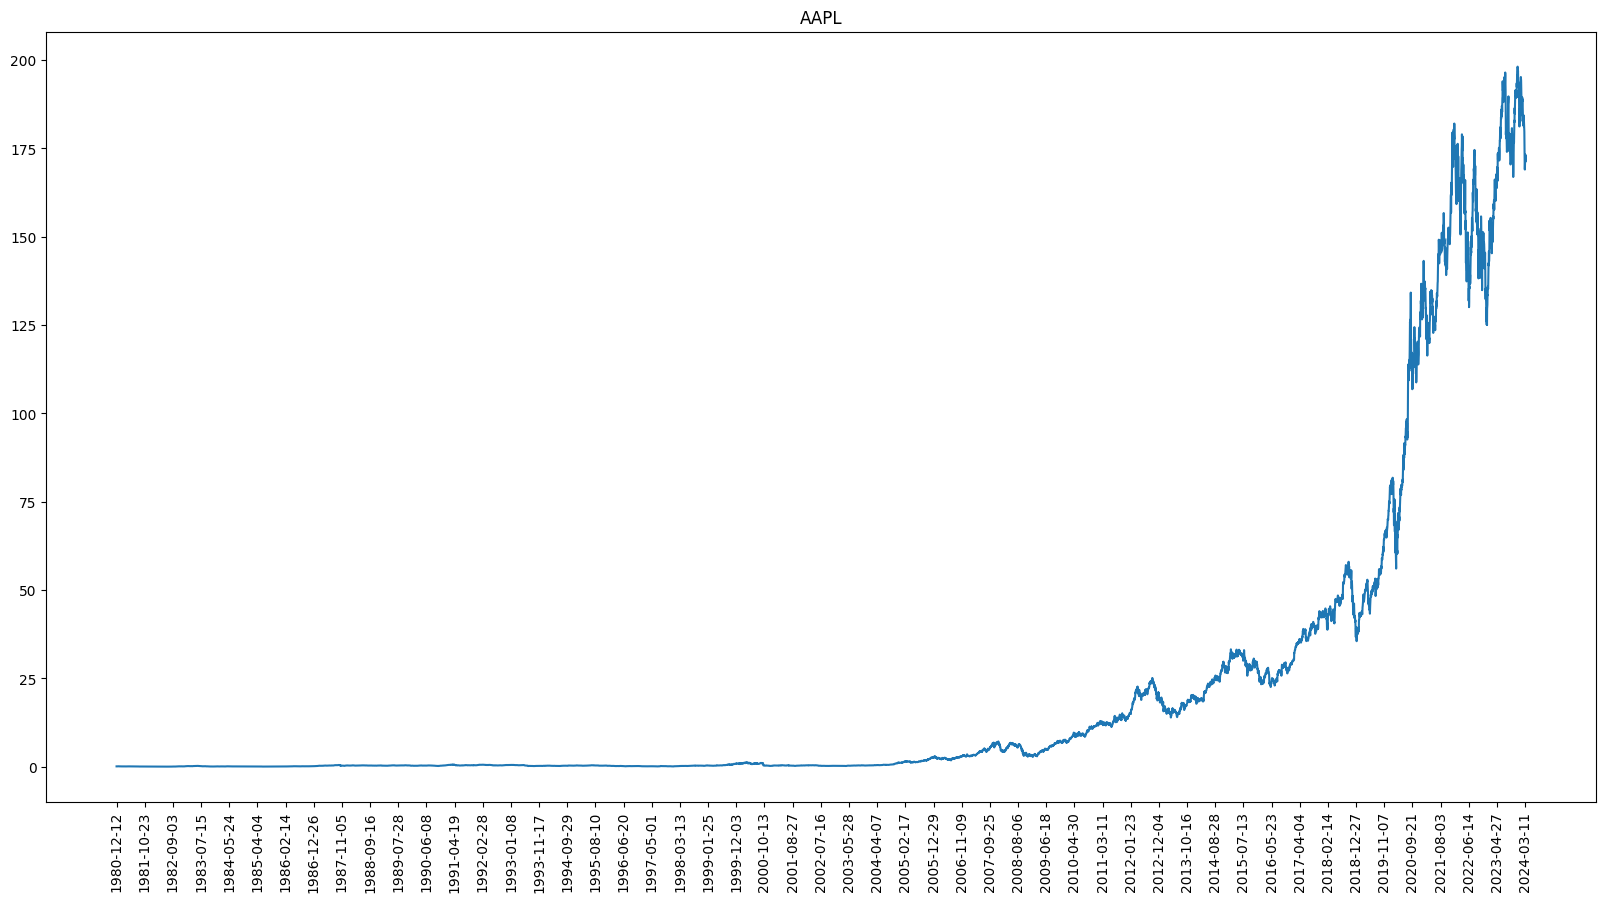

In [29]:
for i, df in enumerate(dfs_sorted):  # iterate through the sorted dataframes
    if not df.empty:  # check if the dataframe is not empty
        plot_df(df, df["Symbol"].iloc[0])  # plot the dataframe
    else:
        print(f"Dataframe for ticker {tickers[i]} is empty.")  # print a message if the dataframe is empty

plt.tight_layout()  # adjust the layout
plt.show()  # display the plots